In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('Titanic-dataset.csv',usecols = ['Age','Fare','Survived'])

In [8]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [15]:
df['Age'].isnull().sum()

177

In [27]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
median = df.Age.median()
median

28.0

In [30]:
impute_nan(df,'Age',median)

In [31]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [33]:
df['Age_random'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 50.  , 31.  ,  0.92, 34.  ,
       15.  ,  8.  , 36.  , 19.  , 40.  , 65.  , 66.  , 42.  , 21.  ,
       18.  , 47.  ,  3.  ,  7.  , 49.  , 29.  , 28.5 ,  5.  , 11.  ,
       45.  , 33.  , 17.  , 32.  , 16.  , 25.  ,  0.75, 24.  ,  0.83,
       30.  , 23.  , 46.  , 59.  , 71.  , 37.  , 14.5 , 70.5 , 32.5 ,
       12.  ,  9.  , 36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 52.  ,
       61.  , 56.  , 45.5 , 20.5 , 62.  , 41.  , 63.  , 57.  , 13.  ,
       23.5 , 43.  , 60.  ,  0.42, 10.  , 64.  , 48.  , 53.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 , 34.5 , 74.  ])

In [34]:
df['Age_median'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

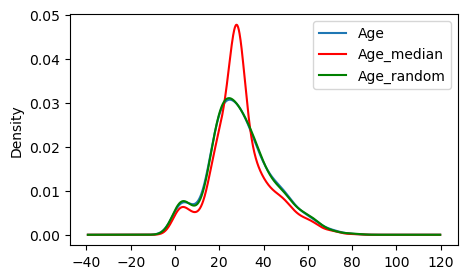

In [36]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')